In [30]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics 

from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import matplotlib.pyplot as plt

from optparse import OptionParser
import sys
from time import time

import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns

%matplotlib inline

In [33]:
df =  pd.read_csv('holczer_LS_fit_July26.csv')

In [34]:
df

,KOI,P_ttv [cycles],amplitude_ttv [min],delta_BIC,P_lin,P_ttv [days]
0,1.01,2.853987,1.328642e-02,-8.143485,2.470613,7.051100
1,2.01,2.008973,5.490948e-02,7.463235,2.204735,4.429253
2,3.01,3.138830,1.056643e-01,15.435857,4.887803,15.341984
3,5.01,10.926648,5.987540e-01,1.808215,4.780328,52.232961
4,7.01,2.584302,1.169016e+00,6.161470,3.213669,8.305091
...,...,...,...,...,...,...
2594,5958.01,3.532934,3.029475e+01,-1.158730,226.496097,800.195790
2595,5959.01,2.554113,7.188461e+01,16.715621,251.479044,642.305784
2596,5968.01,2.866667,3.449107e+01,11.146999,97.942772,280.769281
2597,5969.01,14.000000,2.376538e+02,2.052101,163.869589,2294.174246


In [35]:
df.describe()

,KOI,P_ttv [cycles],amplitude_ttv [min],delta_BIC,P_lin,P_ttv [days]
count,2599.000000,2565.000000,2.565000e+03,2.565000e+03,2565.000000,2565.000000
mean,2069.717049,17.413376,3.157801e+15,1.688438e+04,47.751936,393.055469
std,1646.054110,60.732012,3.748421e+16,5.452165e+05,63.655382,601.890228
min,1.010000,2.000000,1.328642e-02,-8.143485e+00,0.582895,1.901285
25%,718.025000,2.772221,7.466855e+00,9.492381e+00,9.034196,46.995180
50%,1751.010000,4.642378,1.690793e+01,2.527982e+01,20.381773,149.956621
75%,2861.010000,11.690273,3.975678e+01,6.681748e+01,53.717990,460.769161
max,5970.010000,1382.297533,9.530673e+17,2.527460e+07,305.612404,2934.187820


In [36]:
df = df.dropna()

In [37]:
df

,KOI,P_ttv [cycles],amplitude_ttv [min],delta_BIC,P_lin,P_ttv [days]
0,1.01,2.853987,1.328642e-02,-8.143485,2.470613,7.051100
1,2.01,2.008973,5.490948e-02,7.463235,2.204735,4.429253
2,3.01,3.138830,1.056643e-01,15.435857,4.887803,15.341984
3,5.01,10.926648,5.987540e-01,1.808215,4.780328,52.232961
4,7.01,2.584302,1.169016e+00,6.161470,3.213669,8.305091
...,...,...,...,...,...,...
2594,5958.01,3.532934,3.029475e+01,-1.158730,226.496097,800.195790
2595,5959.01,2.554113,7.188461e+01,16.715621,251.479044,642.305784
2596,5968.01,2.866667,3.449107e+01,11.146999,97.942772,280.769281
2597,5969.01,14.000000,2.376538e+02,2.052101,163.869589,2294.174246


In [41]:
df = df[df['delta_BIC'] > 10]

In [43]:
# Create a list of DataFrames, where each DataFrame represents a unique value in the 'KOI' column
holczer_catalog_by_koi = [group_df for _, group_df in df.groupby('KOI')]
holczer_catalog_by_koi

[    KOI  P_ttv [cycles]  amplitude_ttv [min]  delta_BIC     P_lin  \
 2  3.01         3.13883             0.105664  15.435857  4.887803   
 
    P_ttv [days]  
 2     15.341984  ,
      KOI  P_ttv [cycles]  amplitude_ttv [min]   delta_BIC      P_lin  \
 6  12.01       69.921847             1.153954  260.519694  17.855219   
 
    P_ttv [days]  
 6   1248.469909  ,
      KOI  P_ttv [cycles]  amplitude_ttv [min]  delta_BIC     P_lin  \
 8  17.01        3.368362             0.111276  10.630631  3.234699   
 
    P_ttv [days]  
 8     10.895637  ,
       KOI  P_ttv [cycles]  amplitude_ttv [min]   delta_BIC     P_lin  \
 13  41.02        2.267717            32.661551  241.972726  6.887125   
 
     P_ttv [days]  
 13      15.61805  ,
       KOI  P_ttv [cycles]  amplitude_ttv [min]   delta_BIC      P_lin  \
 14  41.03       28.048104             58.75323  101.518024  35.333128   
 
     P_ttv [days]  
 14    991.027235  ,
       KOI  P_ttv [cycles]  amplitude_ttv [min]    delta_BIC      P_l

In [31]:
n_components = 2
tsne = TSNE(n_components)

In [32]:
tsne_result = tsne.fit_transform(holczer_catalog_by_koi[0]['TTV'])
tsne_result.shape

/opt/anaconda3/envs/DSFP/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/DSFP/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[-5.00e-02  7.70e-02 -3.70e-02 -2.71e-01 -3.00e-03  6.10e-02  1.75e-01
  1.86e-01  4.70e-02 -8.20e-02 -1.96e-01  7.50e-02 -2.40e-02  1.12e-01
  5.10e-02 -1.10e-02 -2.24e-01  1.07e-01  5.90e-02  1.00e-03 -4.60e-02
 -3.10e-02  1.08e-01 -1.60e-02 -3.00e-03  7.30e-02  2.60e-02 -7.90e-02
 -1.97e-01  1.30e-02 -8.00e-03  9.80e-02  1.74e-01  8.40e-02  0.00e+00
  1.60e-02 -1.26e-01 -2.00e-03  3.09e-01  7.70e-02  1.15e-01 -1.00e-02
 -2.80e-02  1.54e-01  6.60e-02  1.53e-01 -1.21e-01  2.80e-02 -3.50e-02
 -7.10e-02 -7.80e-02 -1.93e-01 -1.46e-01  3.50e-02  1.32e-01 -9.00e-03
 -3.70e-02 -6.01e+01 -1.80e-02  3.80e-02 -2.11e-01  3.10e-02 -5.00e-02
 -1.90e-02  2.40e-02  7.70e-02 -2.10e-02 -8.00e-03 -1.14e-01  2.12e-01
  8.60e-02 -1.80e-02 -6.20e-02  6.10e-02 -1.64e-01 -7.80e-02  9.50e-02
  2.20e-02  5.00e-03 -7.80e-02 -1.00e-01 -5.20e-02  1.64e-01 -3.50e-02
  1.81e+00 -1.43e-01  1.81e-01  3.00e-02  3.30e-02 -3.00e-02 -4.00e-02
  9.80e-02  1.28e-01 -4.70e-02  6.00e-02  5.20e-02  1.50e-02  6.20e-02
 -3.70e-02 -8.50e-02  1.72e-01  3.69e-01 -2.44e-01 -8.50e-02  2.20e-02
  3.80e-02 -7.10e-02 -3.25e-01 -1.70e-02  1.03e-01  2.65e-01  2.70e-01
  3.00e-02 -1.07e-01  1.24e-01  1.90e-02  5.60e-02 -8.00e-03  5.30e-02
 -3.27e-01 -2.10e-02  1.81e-01 -4.00e-03 -6.00e-02 -4.70e-02  0.00e+00
 -1.00e-02  1.40e-02 -8.70e-02  1.04e-01  1.25e-01  8.80e-02 -1.84e-01
  3.80e-02 -9.00e-03  1.28e-01 -2.50e-02 -1.13e-01 -6.50e-02 -1.00e-02
  6.00e-02  6.20e-02  1.10e-01 -3.10e-02  5.40e-02 -1.64e-01 -4.10e-02
 -6.40e-02 -7.20e-02  2.00e-02 -2.30e-02 -1.68e-01 -1.36e-01 -6.00e-02
 -1.32e-01 -9.20e-02 -9.30e-02  1.50e-02 -7.70e-02 -2.70e-02  6.90e-02
  7.50e-02 -1.68e-01 -7.30e-02 -1.04e-01 -1.76e-01  4.10e-02 -3.10e-02
  2.70e-02 -1.13e-01  4.10e-02 -4.00e-02 -1.10e-02 -3.30e-02 -6.00e-02
  1.58e-01  2.30e-02 -6.30e-02  1.06e-01  1.10e-02 -6.40e-02 -4.10e-02
 -1.86e-01 -9.80e-02 -1.08e-01 -1.31e-01 -5.70e-02  7.30e-02  7.30e-02
 -2.30e-02  2.09e-01  4.90e-02  1.94e-01  5.60e-02  8.00e-03  1.15e-01
 -8.00e-03 -1.37e-01  0.00e+00  1.70e-02 -8.10e-02 -9.50e-02  1.38e-01
 -1.36e-01  8.90e-02 -7.00e-03  1.58e-01  7.80e-02 -9.60e-02  4.90e-02
  9.30e-02  1.04e-01 -3.10e-02 -1.05e-01 -7.50e-02  7.30e-02  3.00e-03
  0.00e+00  1.22e-01  1.17e-01 -1.00e-03 -7.30e-02 -3.30e-02  8.00e-03
 -5.30e-02  3.90e-02 -2.70e-02  2.12e-01  3.00e-02  1.23e-01 -1.05e-01
 -1.40e-02  3.60e-02  4.10e-02  3.20e-02 -2.10e-02  1.63e-01  1.80e-02
  5.00e-03  3.30e-02 -1.15e-01  2.80e-02 -1.55e-01  1.80e-02  7.00e-02
  1.80e-02  2.06e-01  1.09e-01  2.22e-01  2.06e-01 -2.10e-02 -1.16e-01
 -6.00e-03 -1.30e-02 -2.30e-02 -1.14e-01  3.75e-01  6.90e-02 -5.50e-02
  8.00e-02 -1.10e-02 -4.00e-03 -4.30e-02 -9.20e-02 -1.32e-01  1.09e-01
  2.20e-02  4.90e-02 -1.00e-03  2.10e-01 -7.90e-02 -5.20e-02 -1.23e-01
 -4.80e-02 -1.15e-01 -2.12e-01  7.50e-02 -5.00e-02  3.10e-02 -1.57e-01
  8.80e-02  9.00e-02 -6.30e-02 -4.40e-02 -1.80e-01 -1.45e-01  9.80e-02
 -1.30e-02  1.14e-01 -1.01e-01 -6.00e-03 -3.90e-02 -1.70e-02  4.40e-02
 -1.12e-01  2.60e-02  9.30e-02  3.40e-02 -1.10e-02  5.00e-03  9.00e-02
  2.34e-01 -6.70e-02  5.60e-02  2.60e-02  2.40e-02  1.08e-01  4.70e-02
  2.00e-03 -5.90e-02 -1.25e-01 -7.40e-02  3.20e-02  8.30e-02  1.26e-01
  5.70e-02  5.60e-02 -1.50e-01  3.10e-02 -1.14e-01 -6.50e-02  1.00e-02
  1.09e-01  6.00e-03  4.60e-02 -2.70e-02 -9.00e-03 -1.11e-01  1.85e-01
  8.00e-02 -1.52e-01 -2.04e-01 -7.80e-02 -3.00e-03 -6.80e-02  4.50e-02
 -1.16e-01  5.70e-02 -1.53e-01 -8.20e-02 -4.90e-02 -9.90e-02 -1.73e-01
  6.50e-02 -1.47e-01  3.40e-02  3.60e-02 -5.90e-02 -7.60e-02  3.00e-03
  0.00e+00 -5.15e-01  1.26e-01 -2.00e-03 -1.10e-02 -4.60e-02  2.91e-01
  2.64e-01  6.60e-02 -1.90e-02  3.00e-02 -6.90e-02  3.30e-02  8.90e-02
 -1.30e-01 -2.40e-02 -3.40e-02 -1.60e-02  1.56e-01  4.10e-02 -5.80e-02
 -1.20e-02  5.10e-02  5.40e-02 -1.00e-03 -1.90e-02  1.45e-01  2.00e-03
 -1.19e-01 -4.90e-01 -1.74e-01 -8.50e-02 -1.01e-01 -3.20e-02  1.23e-01
 -2.60e-02  1.70e-02  1.00e-02  3.10e-02  8.00e-02  3.39e-01 -8.00e-03
 -1.02e-01  5.30e-02  3.40e-02 -4.00e-03 -6.80e-02 -1.08e-01 -9.00e-02
  1.38e-01  4.60e-02  4.00e-03 -1.16e-01  1.02e-01  7.00e-03  1.52e-01
 -4.35e-01  4.90e-02  7.80e-02 -1.09e-01  4.90e-01  4.00e-03 -2.60e-02
  1.06e-01  1.00e-02 -4.70e-02  2.49e-01 -4.00e-03  3.30e-02 -1.46e-01
 -1.58e-01  1.25e-01  1.30e-02 -6.90e-02  1.06e-01  1.22e-01 -5.00e-02
  1.11e-01  1.42e-01 -4.30e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

/opt/anaconda3/envs/DSFP/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/DSFP/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


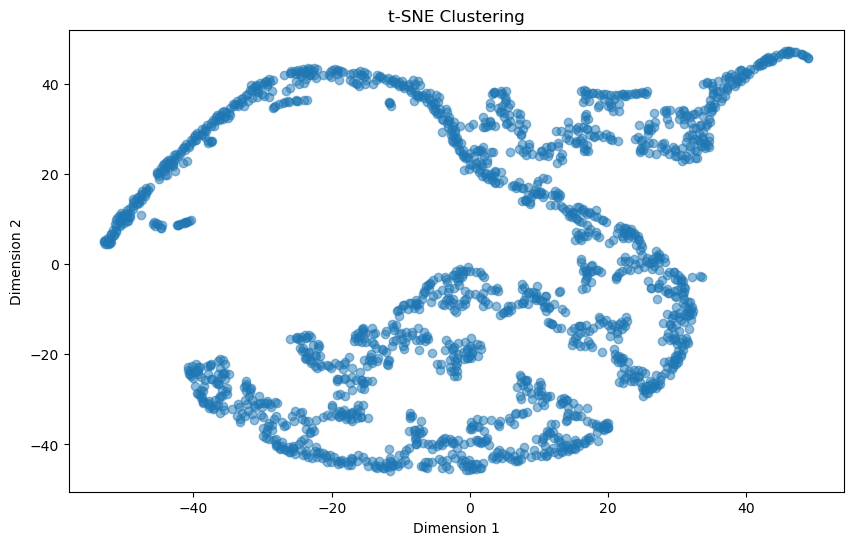

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Drop the 'KOI' column, as we don't want to cluster based on it
data = df.drop(columns=['KOI', 'P_ttv [days]', 'delta_BIC'])

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)

# Create a new DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])

# Plot the t-SNE results as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], alpha=0.5)
plt.title('t-SNE Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

